In [ ]:
# ! pip3 install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


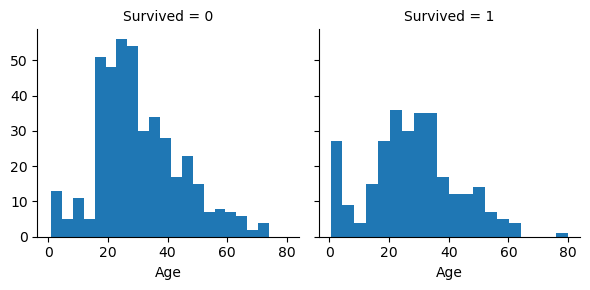

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

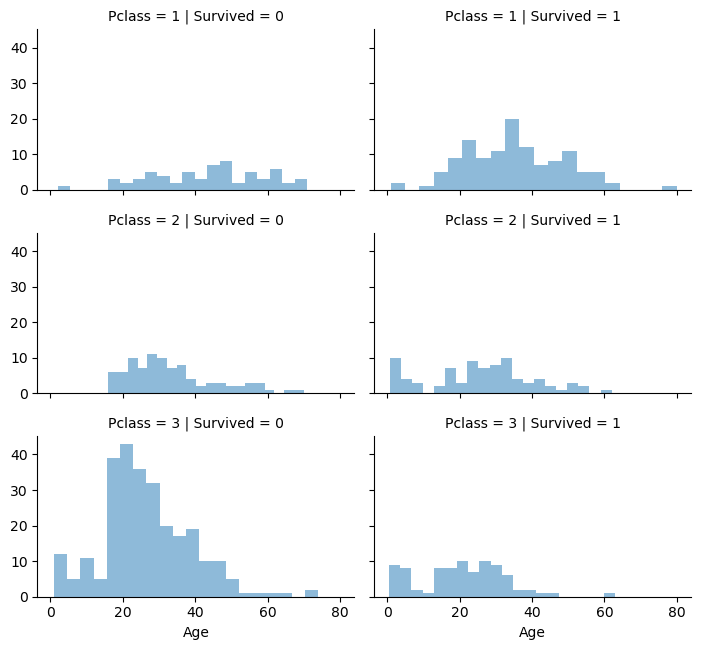

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


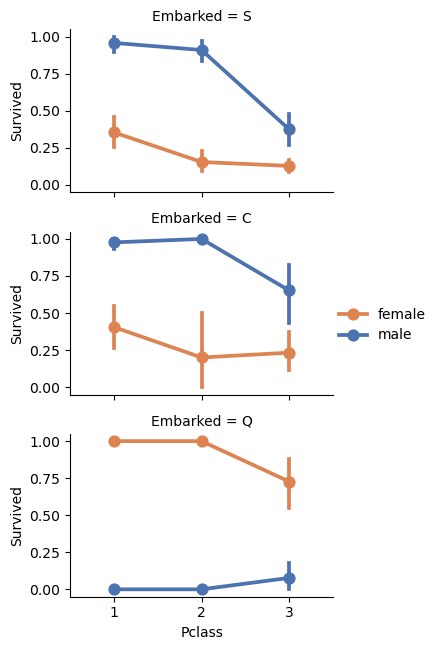

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/spacelord/anaconda3/envs/llms/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parame

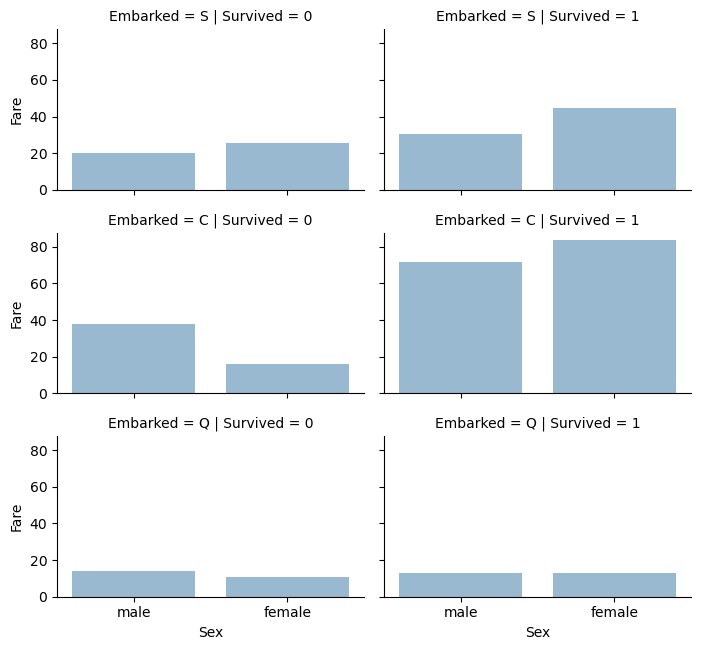

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [17]:
# print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
# test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
# combine = [train_df, test_df]

# "After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

In [18]:
## # Q2 Improvement: We are keeping the 'Cabin' column for now to extract the Deck feature from it.
# We will still drop 'Ticket' as it is noisy.

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Ticket'], axis=1, errors='ignore')
# test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1, errors='ignore')
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [19]:
# Q2 Improvement: Create a 'Deck' feature from the 'Cabin' column.
# A passenger's deck is a strong indicator of their socio-economic status and survival chance.
# We fill missing values with 'U' for 'Unknown'.
for dataset in combine:
    # Check if 'Cabin' column exists before processing
    if 'Cabin' in dataset.columns:
        dataset['Deck'] = dataset['Cabin'].str.extract('([A-Za-z])', expand=False)
        dataset['Deck'] = dataset['Deck'].fillna('U')
    else:
        # If 'Cabin' is not present, ensure 'Deck' is initialized to 'U' if it doesn't exist
        if 'Deck' not in dataset.columns:
            dataset['Deck'] = 'U'
        dataset['Deck'] = dataset['Deck'].fillna('U')

# Now we can map the Deck to a numerical value and drop the original Cabin feature
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "U": 0}
for dataset in combine:
    # Ensure 'Deck' column exists before mapping
    if 'Deck' in dataset.columns:
        dataset['Deck'] = dataset['Deck'].map(deck_mapping)
    else:
        # Fallback: set to 0 (for 'U')
        dataset['Deck'] = 0

# Drop 'Cabin' column from train_df and test_df, ignoring errors if it's already dropped
train_df = train_df.drop(['Cabin'], axis=1, errors='ignore')
test_df = test_df.drop(['Cabin'], axis=1, errors='ignore')

# Re-assign combine with the potentially modified train_df and test_df
combine = [train_df, test_df]

print("Created 'Deck' feature and dropped 'Cabin'.")
train_df.head()

Created 'Deck' feature and dropped 'Cabin'.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0


In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


In [23]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,3,3
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,3,3
4,0,3,0,35.0,0,0,8.0500,S,0,1


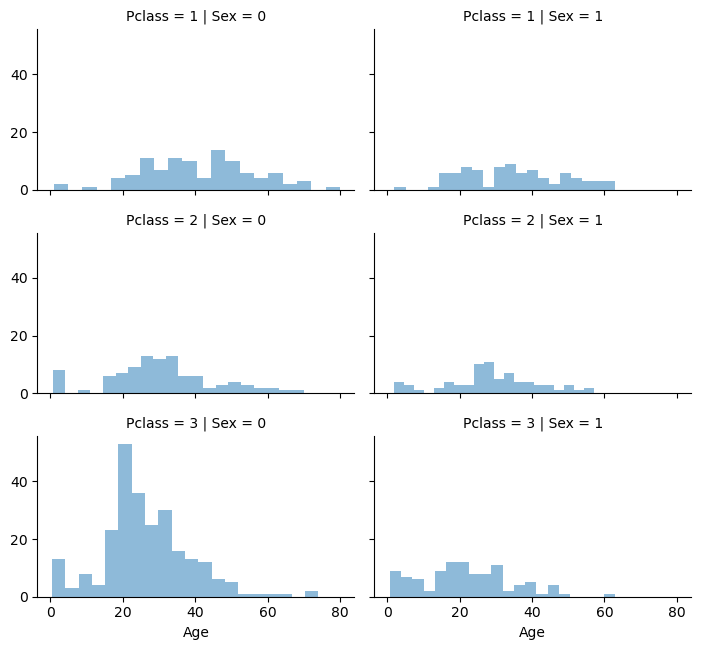

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [27]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7.2500,S,0,1
1,1,1,1,38,1,0,71.2833,C,3,3
2,1,3,1,26,0,0,7.9250,S,0,2
3,1,1,1,35,1,0,53.1000,S,3,3
4,0,3,0,35,0,0,8.0500,S,0,1


In [28]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/var/folders/_b/dy79ryls7j58krx5q5vbwf200000gn/T/ipykernel_39274/987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [29]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,0,1,"(32.0, 48.0]"


In [30]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,1,1,0,7.2500,S,0,1
1,1,1,1,2,1,0,71.2833,C,3,3
2,1,3,1,1,0,0,7.9250,S,0,2
3,1,1,1,2,1,0,53.1000,S,3,3
4,0,3,0,2,0,0,8.0500,S,0,1


In [31]:
# for dataset in combine:
#     dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [32]:
# for dataset in combine:
#     dataset['IsAlone'] = 0
#     dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

In [33]:
# train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
# combine = [train_df, test_df]

# train_df.head()

In [34]:
# Q2 Improvement: Create a categorical 'FamilySize' feature instead of just 'IsAlone'.
# This captures the non-linear effect where survival was highest for small families (2-4 members).

for dataset in combine:
    # Check if required columns exist before creating FamilySize
    if 'SibSp' in dataset.columns and 'Parch' in dataset.columns:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    elif 'FamilySize' not in dataset.columns:
        # If SibSp/Parch are missing and FamilySize doesn't exist, skip creation
        print("Warning: 'SibSp' or 'Parch' not found. Skipping 'FamilySize' creation.")
        continue

# Create categorical bins based on FamilySize
for dataset in combine:
    # Only create FamilySizeCat if FamilySize exists
    if 'FamilySize' in dataset.columns:
        dataset['FamilySizeCat'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'FamilySizeCat'] = 0 # Alone
        dataset.loc[(dataset['FamilySize'] > 1) & (dataset['FamilySize'] <= 4), 'FamilySizeCat'] = 1 # Small Family
        dataset.loc[dataset['FamilySize'] > 4, 'FamilySizeCat'] = 2 # Large Family

# Drop the old columns with error handling
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, errors='ignore')
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, errors='ignore')
combine = [train_df, test_df]

# Check the correlation of the new feature
if 'FamilySizeCat' in train_df.columns and 'Survived' in train_df.columns:
    print(train_df[['FamilySizeCat', 'Survived']].groupby(['FamilySizeCat'], as_index=False).mean())
else:
    print("Warning: 'FamilySizeCat' or 'Survived' not found. Skipping correlation check.")

   FamilySizeCat  Survived
0              0  0.303538
1              1  0.578767
2              2  0.161290


In [35]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [36]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySizeCat,Age*Class
0,0,3,0,1,7.2500,0,0,1,1,3
1,1,1,1,2,71.2833,1,3,3,1,2
2,1,3,1,1,7.9250,0,0,2,0,3
3,1,1,1,2,53.1000,0,3,3,1,2
4,0,3,0,2,8.0500,0,0,1,0,6


In [39]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

/var/folders/_b/dy79ryls7j58krx5q5vbwf200000gn/T/ipykernel_39274/31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySizeCat,Age*Class
0,892,3,0,2,7.8292,2,0,1,0,6
1,893,3,1,2,7.0000,0,0,3,1,6
2,894,2,0,3,9.6875,2,0,1,0,6
3,895,3,0,1,8.6625,0,0,1,0,3
4,896,3,1,1,12.2875,0,0,3,1,3


In [40]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/_b/dy79ryls7j58krx5q5vbwf200000gn/T/ipykernel_39274/2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySizeCat,Age*Class
0,0,3,0,1,0,0,0,1,1,3
1,1,1,1,2,3,1,3,3,1,2
2,1,3,1,1,1,0,0,2,0,3
3,1,1,1,2,3,0,3,3,1,2
4,0,3,0,2,1,0,0,1,0,6
5,0,3,0,1,1,2,0,1,0,3
6,0,1,0,3,3,0,5,1,0,3
7,0,3,0,0,2,0,0,4,2,0
8,1,3,1,1,1,0,0,3,1,3
9,1,2,1,0,2,1,0,3,1,0


In [42]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Title,FamilySizeCat,Age*Class
0,892,3,0,2,0,2,0,1,0,6
1,893,3,1,2,0,0,0,3,1,6
2,894,2,0,3,1,2,0,1,0,6
3,895,3,0,1,1,0,0,1,0,3
4,896,3,1,1,1,0,0,3,1,3
5,897,3,0,0,1,0,0,1,0,0
6,898,3,1,1,0,2,0,2,0,3
7,899,2,0,1,2,0,0,1,1,2
8,900,3,1,1,0,1,0,3,0,3
9,901,3,0,1,2,0,0,1,1,3


In [43]:
# X_train = train_df.drop("Survived", axis=1)
# Y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()
# X_train.shape, Y_train.shape, X_test.shape

In [44]:
# Q2 Improvement: Add Feature Scaling.
# Models like Logistic Regression, SVC, and KNN perform much better on scaled data.
# We will use StandardScaler to standardize features to have a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train and X_test have been scaled.")

X_train and X_test have been scaled.


In [46]:
# # Logistic Regression

# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

logreg = LogisticRegression()
logreg.fit(X_train_scaled, Y_train)
Y_pred_log = logreg.predict(X_test_scaled)
acc_log = round(logreg.score(X_train_scaled, Y_train) * 100, 2)
acc_log

81.14

In [47]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.088896
2,Age,0.512452
6,Title,0.505398
5,Deck,0.292613
3,Fare,0.259570
4,Embarked,0.182475
0,Pclass,-0.419850
7,FamilySizeCat,-0.454024
8,Age*Class,-1.444247


In [48]:
# # Support Vector Machines

# svc = SVC()
# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
# acc_svc

svc = SVC()
svc.fit(X_train_scaled, Y_train)
Y_pred_svc = svc.predict(X_test_scaled)
acc_svc = round(svc.score(X_train_scaled, Y_train) * 100, 2)
acc_svc

83.61

In [49]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
# acc_knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, Y_train)
Y_pred_knn = knn.predict(X_test_scaled)
acc_knn = round(knn.score(X_train_scaled, Y_train) * 100, 2)
acc_knn

86.87

In [50]:
# # Gaussian Naive Bayes

# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
# acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
# acc_gaussian

gaussian = GaussianNB()
gaussian.fit(X_train_scaled, Y_train)
Y_pred_gaussian = gaussian.predict(X_test_scaled)
acc_gaussian = round(gaussian.score(X_train_scaled, Y_train) * 100, 2)
acc_gaussian

74.07

In [51]:
# # Perceptron

# perceptron = Perceptron()
# perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
# acc_perceptron

perceptron = Perceptron()
perceptron.fit(X_train_scaled, Y_train)
Y_pred_perceptron = perceptron.predict(X_test_scaled)
acc_perceptron = round(perceptron.score(X_train_scaled, Y_train) * 100, 2)
acc_perceptron

75.31

In [52]:
# # Linear SVC

# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
# acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
# acc_linear_svc

linear_svc = LinearSVC(dual=False) # Added dual=False to prevent convergence warnings
linear_svc.fit(X_train_scaled, Y_train)
Y_pred_linear_svc = linear_svc.predict(X_test_scaled)
acc_linear_svc = round(linear_svc.score(X_train_scaled, Y_train) * 100, 2)
acc_linear_svc

80.13

In [53]:
# # Stochastic Gradient Descent

# sgd = SGDClassifier()
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
# acc_sgd

sgd = SGDClassifier()
sgd.fit(X_train_scaled, Y_train)
Y_pred_sgd = sgd.predict(X_test_scaled)
acc_sgd = round(sgd.score(X_train_scaled, Y_train) * 100, 2)
acc_sgd

74.07

In [54]:
# # Decision Tree

# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
# acc_decision_tree

decision_tree = DecisionTreeClassifier()
# Note: Tree-based models are not sensitive to feature scaling, but we use the scaled data for consistency.
decision_tree.fit(X_train_scaled, Y_train)
Y_pred_dt = decision_tree.predict(X_test_scaled)
acc_decision_tree = round(decision_tree.score(X_train_scaled, Y_train) * 100, 2)
acc_decision_tree

89.9

In [55]:
# # Random Forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# acc_random_forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, Y_train)
Y_pred_rf = random_forest.predict(X_test_scaled)
acc_random_forest = round(random_forest.score(X_train_scaled, Y_train) * 100, 2)
acc_random_forest

89.9

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.90
8,Decision Tree,89.90
1,KNN,86.87
0,Support Vector Machines,83.61
2,Logistic Regression,81.14
7,Linear SVC,80.13
5,Perceptron,75.31
4,Naive Bayes,74.07
6,Stochastic Gradient Decent,74.07


In [57]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)